# Análisis de Clusters y Outliers con DBSCAN

Este notebook implementa el algoritmo DBSCAN en el dataset de clientes mayoristas para detectar clusters y outliers.

## Paso 1: Cargar los datos
Se carga el dataset proporcionado y se realiza una exploración inicial para entender su estructura.

In [1]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv("data/wcd.csv")

# Explorar el dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

## Paso 2: Preprocesamiento de los datos
Seleccionamos las columnas relevantes y estandarizamos los datos para que todas las variables estén en la misma escala.

In [2]:
from sklearn.preprocessing import StandardScaler

# Selección de columnas relevantes
columns_to_cluster = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_scaled = StandardScaler().fit_transform(data[columns_to_cluster])

# Verificar los datos escalados
print(data_scaled[:5])

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]
 [ 0.84023948 -0.05239645 -0.07935618  0.17385884 -0.23191782  1.29934689]]


## Paso 3: Aplicar DBSCAN
Aplicamos el algoritmo DBSCAN con parámetros iniciales `eps` y `min_samples` ajustables.

In [3]:
from sklearn.cluster import DBSCAN

# Parámetros iniciales para DBSCAN
epsilon = 1.5
min_samples = 5

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

# Agregar resultados al DataFrame
data['Cluster'] = clusters
print(data['Cluster'].value_counts())

Cluster
 0    413
-1     27
Name: count, dtype: int64


# Visualizar los clusters utilizando PCA

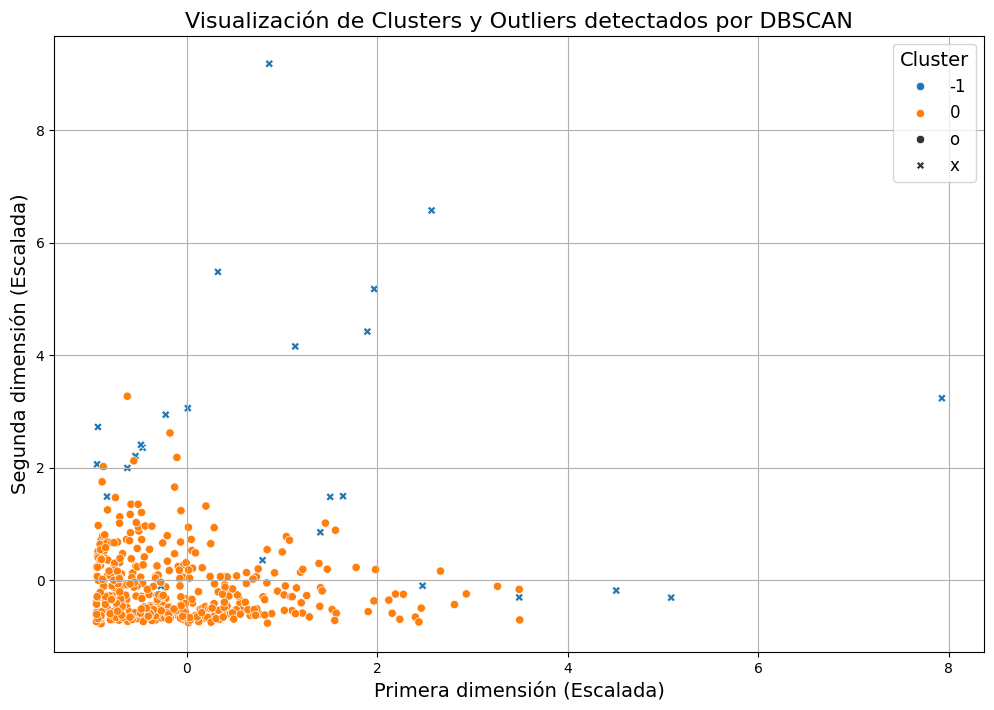

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1],
    hue=data['Cluster'],
    palette='tab10',
    style=np.where(data['Cluster'] == -1, "x", "o")
)
plt.title('Visualización de Clusters y Outliers detectados por DBSCAN', fontsize=16)
plt.xlabel('Primera dimensión (Escalada)', fontsize=14)
plt.ylabel('Segunda dimensión (Escalada)', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True)
plt.show()

## Paso 5: Evaluación del Agrupamiento
Calculamos el Silhouette Score para evaluar la calidad del agrupamiento, siempre que haya al menos 2 clusters válidos.

In [5]:
from sklearn.metrics import silhouette_score

# Verificar clusters válidos
valid_clusters = data['Cluster'].unique()
print(f"Clusters detectados (incluyendo -1 para outliers): {valid_clusters}")

# Excluir outliers (-1) y calcular Silhouette Score si hay suficientes clusters
valid_clusters = [c for c in valid_clusters if c != -1]
if len(valid_clusters) > 1:
    mask = data['Cluster'] != -1
    score = silhouette_score(data_scaled[mask], data['Cluster'][mask])
    print(f"Silhouette Score: {score}")
else:
    print("No se pueden calcular métricas de calidad porque no hay suficientes clusters.")

Clusters detectados (incluyendo -1 para outliers): [ 0 -1]
No se pueden calcular métricas de calidad porque no hay suficientes clusters.
